## Correlation and Data Visulaization

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
file_path = '/content/drive/MyDrive/Colab Notebooks/child_mortality_data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [15]:
# 1. Correlation: Does wealth = health?
correlation = df['GDP'].corr(df['CMR'])
print(f"The correlation between GDP and Mortality is: {correlation}")

The correlation between GDP and Mortality is: -0.48419707320131333


In [16]:
# 2. Outlier Hunt: Low GDP but also Low Mortality
# Let's look for countries with GDP < 5000 but Mortality < 20
high_performers = df[(df['GDP'] < 5000) & (df['CMR'] < 20)]
print(high_performers[['Entity', 'Year', 'CMR']])

            Entity  Year    CMR
32     Afghanistan  1989  18.71
33     Afghanistan  1990  18.07
34     Afghanistan  1991  17.44
35     Afghanistan  1992  16.85
36     Afghanistan  1993  16.30
...            ...   ...    ...
12667     Zimbabwe  2018   5.23
12668     Zimbabwe  2019   5.11
12669     Zimbabwe  2020   5.01
12670     Zimbabwe  2021   4.76
12671     Zimbabwe  2022   4.60

[3865 rows x 3 columns]


In [17]:
# 3. Create a Correlation Matrix
# We select only the numeric columns for this
corr_matrix = df[['CMR', 'GDP', 'Population']].corr()

corr_matrix

,CMR,GDP,Population
CMR,1.000000,-0.484197,-0.021873
GDP,-0.484197,1.000000,0.003404
Population,-0.021873,0.003404,1.000000


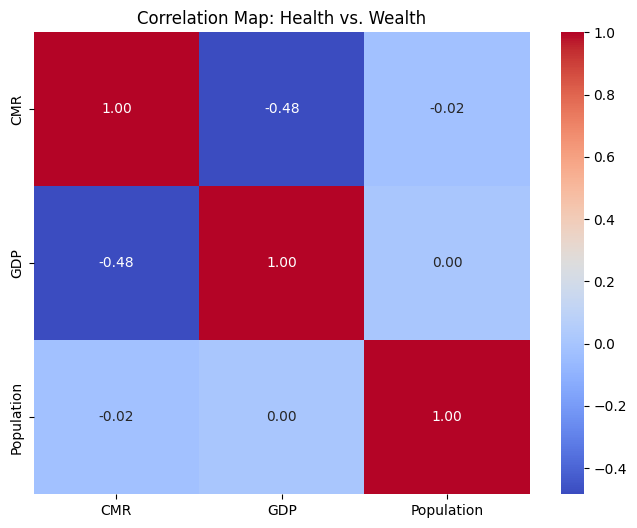

In [18]:
# 4. Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map: Health vs. Wealth')
plt.show()

**Insights:**

1. The Wealth-Health Link (CMR vs. GDP: -0.48)
The value of -0.48 represents a moderate negative correlation.

   What it means: As GDP per capita increases, the Child Mortality Rate (CMR) tends to decrease. This confirms the economic theory that wealthier nations generally have better healthcare infrastructure, nutrition, and sanitation.

2. The Population Factor (CMR vs. Population: -0.02)
The value of -0.02 is very close to zero, indicating no linear correlation.

   What it means: The size of a country’s population has almost no impact on its child mortality rate.

   It proves that a country being "overpopulated" or "small" isn't a primary driver of how well its children survive; it’s about the quality of the economic and health systems, not the quantity of people.

3. GDP and Population (0.00)
The 0.00 correlation between GDP and Population suggests they are independent variables.

   What it means: Having a large population doesn't automatically make a country "richer" or "poorer" per person in this dataset.